This document contains my code with explanations, results and reflection of findings

In [1]:
#we first import the nessesary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

The first step is to import the data we are working with. The test data dataframe provides us with percentages of students who meet or exceed test score standards, charter school information, and grade level while the lunch data provides us with what percentage of students from each school are eligible for free lunch.
Notice there is a lot of information in both files, leaving room for more analysis in the future

Importing data for test scores, charter schools, test type and grade level

In [2]:
Test_Data=pd.read_excel('/content/California_school.xlsx')
Test_Data

,County Code,District Code,District Name,School Code,School Name,Type ID,Filler,Test Year,Test Type,Test ID,...,Composite Area 1 Percentage Below Standard,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total
0,0,0,NaN,0,NaN,4,NaN,2024,B,1,...,29.41,118705,403579,21.25,85753,42.23,170398,36.53,147396,403547
1,0,0,NaN,0,NaN,4,NaN,2024,B,1,...,27.94,115514,413468,20.44,84509,43.99,181886,35.57,147048,413443
2,0,0,NaN,0,NaN,4,NaN,2024,B,1,...,27.56,115320,418400,25.28,105771,42.41,177446,32.31,135169,418386
3,0,0,NaN,0,NaN,4,NaN,2024,B,1,...,31.92,134135,420245,23.68,99528,42.27,177673,34.05,143102,420303
4,0,0,NaN,0,NaN,4,NaN,2024,B,1,...,29.25,124039,424023,27.9,118293,38.79,164467,33.31,141262,424022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102379,58,72769,Wheatland Union High,133751,Edward P. Duplex,7,NaN,2024,B,2,...,95.24,20,21,0,0,23.81,5,76.19,16,21
102380,58,72769,Wheatland Union High,5838305,Wheatland Union High,7,NaN,2024,B,1,...,22.36,53,237,30.38,72,42.62,101,27,64,237
102381,58,72769,Wheatland Union High,5838305,Wheatland Union High,7,NaN,2024,B,1,...,22.36,53,237,30.38,72,42.62,101,27,64,237
102382,58,72769,Wheatland Union High,5838305,Wheatland Union High,7,NaN,2024,B,2,...,49.37,117,237,13.5,32,43.88,104,42.62,101,237


Importing data for percentage of students eligible for free lunch at each school

In [3]:
Lunch=pd.read_excel('/content/Dataproject_lunch.xlsx',skiprows=1)
Lunch

,Academic Year,County Code,District Code,School Code,County Name,District Name,School Name,District Type,School Type,Educational \nOption Type,...,Free Meal \nCount \n(K-12),Percent (%) \nEligible Free \n(K-12),FRPM Count \n(K-12),Percent (%) \nEligible FRPM \n(K-12),Enrollment \n(Ages 5-17),Free Meal \nCount \n(Ages 5-17),Percent (%) \nEligible Free \n(Ages 5-17),FRPM Count \n(Ages 5-17),Percent (%) \nEligible FRPM \n(Ages 5-17),CALPADS Fall 1 \nCertification Status
0,2023-2024,1,10017,112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,County Office of Education (COE),K-12 Schools (Public),Traditional,...,154,0.690583,162,0.726457,222,153,0.689189,161,0.725225,Y
1,2023-2024,1,10017,123968,Alameda,Alameda County Office of Education,Community School for Creative Education,County Office of Education (COE),Elementary Schools (Public),Traditional,...,155,0.833333,170,0.913978,158,131,0.829114,144,0.911392,Y
2,2023-2024,1,10017,124172,Alameda,Alameda County Office of Education,Yu Ming Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,...,257,0.297110,273,0.315607,718,206,0.286908,216,0.300836,Y
3,2023-2024,1,10017,125567,Alameda,Alameda County Office of Education,Urban Montessori Charter,County Office of Education (COE),Elementary Schools (Public),Traditional,...,106,0.303725,117,0.335244,270,88,0.325926,98,0.362963,Y
4,2023-2024,1,10017,130401,Alameda,Alameda County Office of Education,Alameda County Juvenile Hall/Court,County Office of Education (COE),Juvenile Court Schools,Juvenile Court School,...,44,1.000000,44,1.000000,42,42,1.000000,42,1.000000,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10577,2023-2024,58,72751,6056840,Yuba,Wheatland,Wheatland Elementary,Elementary School District,Elementary Schools (Public),Traditional,...,190,0.524862,237,0.654696,253,132,0.521739,168,0.664032,Y
10578,2023-2024,58,72751,6118806,Yuba,Wheatland,Wheatland Charter Academy,Elementary School District,Elementary Schools (Public),Traditional,...,9,0.104651,34,0.395349,65,5,0.076923,24,0.369231,Y
10579,2023-2024,58,72769,123570,Yuba,Wheatland Union High,Wheatland Community Day High,High School District,District Community Day Schools,Community Day School,...,3,0.600000,3,0.600000,5,3,0.600000,3,0.600000,Y
10580,2023-2024,58,72769,133751,Yuba,Wheatland Union High,Edward P. Duplex,High School District,Continuation High Schools,Continuation School,...,27,0.710526,37,0.973684,38,27,0.710526,37,0.973684,Y


Getting rid of columns I'm not using and dropping certain rows with blank entries

In [26]:
CleanedTest=(Test_Data.drop(columns=['District Code','District Name','School Code','Filler','County Code'])
           .dropna(subset='School Name')
           .dropna())

A lot of the numerical data was in string format, this code is fixing that by converting the entries to integers

In [27]:
CleanedTest['Total Students Tested'] = pd.to_numeric(CleanedTest['Total Students Tested'], errors='coerce')
CleanedTest['Count Standard Met'] = pd.to_numeric(CleanedTest['Count Standard Met'], errors='coerce')
CleanedTest['Overall Total'] = pd.to_numeric(CleanedTest['Overall Total'], errors='coerce')
CleanedTest['Count Standard Met and Above'] = pd.to_numeric(CleanedTest['Count Standard Met and Above'], errors='coerce')
CleanedTest['Percentage Standard Met and Above'] = pd.to_numeric(CleanedTest['Percentage Standard Met and Above'], errors='coerce')

This code is making the "percent standard met and above" column into a percent format

In [28]:
CleanedTest=(CleanedTest.assign(percent_students_met_or_exceeded=lambda x:x['Percentage Standard Met and Above']/100)
            .drop(columns=['Percentage Standard Met and Above']))

I am merging the lunch and test dataframes on the school name. This creates a problem, as the lunch and test dataframes are organized differently.

The lunch dataframe "school name" column has only one entry per school

The test dataframe has multiple entries per school under the "school name" columns, with each entry representing a grade level within the school

This will be demonstrated below by picking a random school name, in this case "Envision Academy for Arts and Technology" and seeing how many entires are in the lunch and test dataframe

In [29]:
#filtering out any entry that isn't this specific school in the lunch dataframe
Lunch[Lunch['School Name']=='Envision Academy for Arts & Technology']

,Academic Year,County Code,District Code,School Code,County Name,District Name,School Name,District Type,School Type,Educational \nOption Type,...,Free Meal \nCount \n(K-12),Percent (%) \nEligible Free \n(K-12),FRPM Count \n(K-12),Percent (%) \nEligible FRPM \n(K-12),Enrollment \n(Ages 5-17),Free Meal \nCount \n(Ages 5-17),Percent (%) \nEligible Free \n(Ages 5-17),FRPM Count \n(Ages 5-17),Percent (%) \nEligible FRPM \n(Ages 5-17),CALPADS Fall 1 \nCertification Status
0,2023-2024,1,10017,112607,Alameda,Alameda County Office of Education,Envision Academy for Arts & Technology,County Office of Education (COE),K-12 Schools (Public),Traditional,...,154,0.690583,162,0.726457,222,153,0.689189,161,0.725225,Y


For the test dataset we have multiple entries for Envision Academy for Arts & Technology as each entry is showing a seperate grade level within the school(look at the "Grade" column)

In [30]:
#filtering out any entry that isn't this specific school in the test dataframe
CleanedTest[CleanedTest['School Name']=='Envision Academy for Arts & Technology']

,School Name,Type ID,Test Year,Test Type,Test ID,Student Group ID,Grade,Total Students Enrolled,Total Students Tested,Total Students Tested with Scores,...,Composite Area 1 Count Below Standard,Composite Area 1 Total,Composite Area 2 Percentage Above Standard,Composite Area 2 Count Above Standard,Composite Area 2 Percentage Near Standard,Composite Area 2 Count Near Standard,Composite Area 2 Percentage Below Standard,Composite Area 2 Count Below Standard,Composite Area 2 Total,percent_students_met_or_exceeded
40,Envision Academy for Arts & Technology,9,2024,B,1,1,6,17,16.0,16,...,12,16,0,0,12.5,2,87.5,14,16,0.0625
41,Envision Academy for Arts & Technology,9,2024,B,1,1,7,11,11.0,11,...,5,11,9.09,1,54.55,6,36.36,4,11,0.2727
42,Envision Academy for Arts & Technology,9,2024,B,1,1,8,15,15.0,15,...,9,15,13.33,2,20,3,66.67,10,15,0.1333
43,Envision Academy for Arts & Technology,9,2024,B,1,1,11,50,48.0,47,...,17,47,17.02,8,36.17,17,46.81,22,47,0.2766
45,Envision Academy for Arts & Technology,9,2024,B,2,1,6,17,16.0,16,...,16,16,0,0,12.5,2,87.5,14,16,0.0000
46,Envision Academy for Arts & Technology,9,2024,B,2,1,7,11,11.0,11,...,6,11,0,0,27.27,3,72.73,8,11,0.0909
47,Envision Academy for Arts & Technology,9,2024,B,2,1,8,15,15.0,15,...,12,15,0,0,33.33,5,66.67,10,15,0.0000
48,Envision Academy for Arts & Technology,9,2024,B,2,1,11,50,48.0,48,...,33,48,6.25,3,25,12,68.75,33,48,0.1250


In order to solve this I will modify the test dataframe by averaging each entry(like test scores and amount of students tested) across grade levels in order to have one entry per school so I can properly merge the two dataframes

In [31]:
#applying a groupby function, making schoolname the index with each row within this dataframe now referencing one specific school
Met_or_Exceeded=(CleanedTest[['Total Students Tested','Count Standard Met','School Name','Overall Total','Count Standard Met and Above','Test ID','percent_students_met_or_exceeded']]
            .groupby(by='School Name').mean())

Before I merge I will clean the lunch dataframe a bit more by dropping more columns, only keeping the columns that are useful, like school name, school type etc.

In [32]:
Lunch_percent_eligible=Lunch[['School Name','Percent (%) \nEligible Free \n(K-12)','School Type','Educational \nOption Type','District Name','Charter \nSchool \n(Y/N)']]

Now we can merge the updated lunch and test dataframes on the school name column, giving us a comprehensive dataframe showing both percent eligible for free lunch and percent of students who met or exceeded test scores for each school

In [33]:
merge=pd.merge(Met_or_Exceeded,Lunch_percent_eligible,on='School Name',how='inner')
merge.head(3)

,School Name,Total Students Tested,Count Standard Met,Overall Total,Count Standard Met and Above,Test ID,percent_students_met_or_exceeded,Percent (%) \nEligible Free \n(K-12),School Type,Educational \nOption Type,District Name,Charter \nSchool \n(Y/N)
0,21st Century Learning Institute,28.642857,6.583333,31.833333,10.250,1.5,0.306758,0.619048,Alternative Schools of Choice,Alternative School of Choice,Beaumont Unified,No
1,A. E. Arnold Elementary,85.750000,25.750000,85.625000,50.125,1.5,0.583200,0.391597,Elementary Schools (Public),Traditional,Cypress Elementary,No
2,A. G. Cook Elementary,52.000000,13.750000,52.000000,41.875,1.5,0.806275,0.470423,Elementary Schools (Public),Traditional,Garden Grove Unified,No


For some reason when I was working with the dataframe, the charter school column was giving me multiple no values instead of one, most likely due to some human error when inputing values. This is shown below

In [34]:
#code is countin geach time an entry has a no or yes value(in this case there are two no's for some reason)
merge.groupby(by='Charter \nSchool \n(Y/N)').count()

,School Name,Total Students Tested,Count Standard Met,Overall Total,Count Standard Met and Above,Test ID,percent_students_met_or_exceeded,Percent (%) \nEligible Free \n(K-12),School Type,Educational \nOption Type,District Name
Charter School (Y/N),,,,,,,,,,,
No,14,14,12,12,12,14,12,14,14,14,14
No,8415,8276,7989,7989,7989,8415,7989,8415,8415,8415,8415
Yes,1213,1212,1188,1188,1188,1213,1188,1213,1213,1213,1213


This is fixed here

In [35]:
#this code only allows for two entries, either one yes or one no to filter our incorrect entries
merge=(merge
       .assign(Charter_School=lambda x:(x['Charter \nSchool \n(Y/N)'] == 'Yes')|(x['Charter \nSchool \n(Y/N)'] == 'No'))
       .replace({True: 'Yes', False: 'No'}))

Below is the first graph of the code. This is a very messy plot that shows all of our data and gives us a rough image of what to expect moving forward. While this data will be looked at more carefully, this gives us a general view of how test scores and free lunch are related. We see a generally negative relationship

Keep in mind because all of my analysis is measuring how economic factors includence aspects of testing, the x axis will always be percent of students eligible for free lunch and the y axis will always be percent of students meeting or exceeding test score standards.

Text(0, 0.5, 'Percent Students Met or Exceeded Test Score Standard')

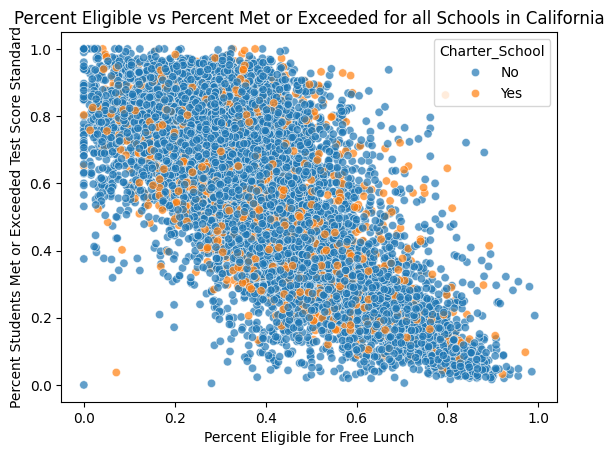

In [36]:
#notice this graph also takes into account charter schools. More thoughrough analysis of charter school relationships will be measured later
sns.scatterplot(merge,x='percent_students_met_or_exceeded',y='Percent (%) \nEligible Free \n(K-12)',hue='Charter_School',alpha=.7)
plt.title('Percent Eligible vs Percent Met or Exceeded for all Schools in California')
plt.xlabel('Percent Eligible for Free Lunch')
plt.ylabel('Percent Students Met or Exceeded Test Score Standard')


Due to the sheer amount and broadness of the data, its better to measure in chunks, and this begins the start of my questions

**How does poverty affect test scores for elementary, middle and high school students?**

---



First we create our dataframes for elementary, middle and high school by filtering boolean values for each category

In [37]:
Elementary=merge[merge['School Type']=='Elementary Schools (Public)']

In [38]:
Middle_School=merge[merge['School Type']=='Intermediate/Middle Schools (Public)']

In [39]:
High_School=merge[merge['School Type']=='High Schools (Public)']

Now that we have the dataframes set up, we can graph them using relationshps betweeen our Percent (%) \nEligible Free \n(K-12) column and percent_students_met_or_exceeded column. Each part of the code is explained below, but it is all essentially just setting up my graph properly

Text(0.5, 0.98, 'Writing and Math Scores')

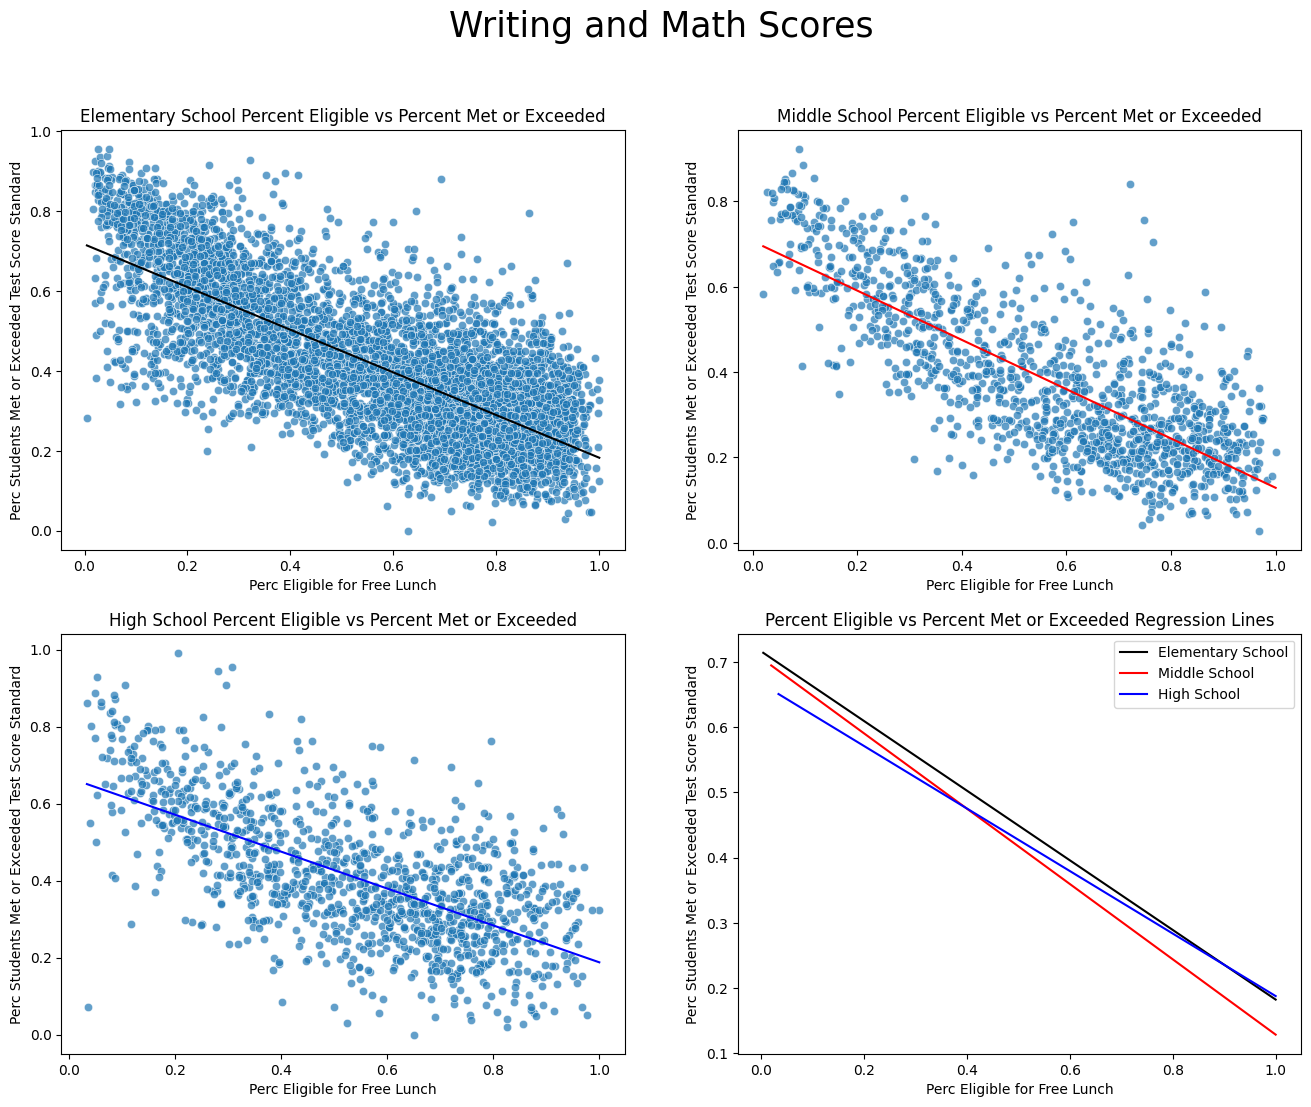

<Figure size 790x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [40]:
#setting up figure size and axes for four figures
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#setting up the first figure, showing scatterplot and regression line for elementary school data
plt.figure(figsize=(7.9, 6))
sns.scatterplot(Elementary,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',alpha=.7,ax=axes[0,0])
sns.regplot(Elementary,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',ax=axes[0,0],
            scatter=False, color='black', line_kws={'linewidth':1.5},ci=None)

#setting up title and x,y labels for elementary school graph
axes[0,0].set_title('Elementary School Percent Eligible vs Percent Met or Exceeded')
axes[0,0].set_xlabel('Perc Eligible for Free Lunch')
axes[0,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#setting up second figure, showing scatterplot and regression line for middle school data
plt.figure(figsize=(8, 6))
sns.scatterplot(Middle_School,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',alpha=.7,ax=axes[0,1])
sns.regplot(data=Middle_School, x='Percent (%) \nEligible Free \n(K-12)',ax=axes[0,1],
            y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5},ci=None)

#setting up title and x,y labels for middle school data
axes[0,1].set_title('Middle School Percent Eligible vs Percent Met or Exceeded')
axes[0,1].set_xlabel('Perc Eligible for Free Lunch')
axes[0,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#setting up third figure, showing scatterplot and regression line for high school data
plt.figure(figsize=(8, 6))
sns.scatterplot(High_School,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',alpha=.7,ax=axes[1,0])
sns.regplot(High_School,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',ax=axes[1,0],
            scatter=False, color='blue', line_kws={'linewidth':1.5},ci=None)

#setting up title and x,y labels for high school data
axes[1,0].set_title('High School Percent Eligible vs Percent Met or Exceeded')
axes[1,0].set_xlabel('Perc Eligible for Free Lunch')
axes[1,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#setting up fourth and final figure comparing regression lines for elementary, middle and high school graphs
plt.figure(figsize=(8, 6))
sns.regplot(Elementary,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='black', line_kws={'linewidth':1.5},label='Elementary School',ci=None)

sns.regplot(data=Middle_School, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='red', line_kws={'linewidth':1.5},label='Middle School',ci=None)

sns.regplot(High_School,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',ax=axes[1, 1],
            scatter=False, color='blue', line_kws={'linewidth':1.5},label='High School',ci=None)

#setting up legend, title and x,y labels for regression line data
axes[1,1].legend()
axes[1,1].set_title('Percent Eligible vs Percent Met or Exceeded Regression Lines')
axes[1,1].set_xlabel('Perc Eligible for Free Lunch')
axes[1,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#setting the title for the overal graph. The reason it says writing and math scores is because we will distinguish between these in later graphs
fig.suptitle('Writing and Math Scores',fontsize=25)

This graph shows pretty significant evidence that when students are affected by poverty it is harder to achieve academic performance across all grade levels.

When looking at the regression lines(bottom right figure) we see that high schoolers are the least affected by poverty and middle schoolers are the most affected by poverty. This can be seen by their relative slope steepness.

**Next** Question, are reading or math scores more affected by poverty?

---



The measurement of whether a test is english or math is given by the Test ID, which serves a dummy variable.

1=English
2=Math

Unfortunately this creates a problem relating to the groupby issue that we adressed earlier in the code

In order to understand this problem lets look at the "Envision Arts Academy" in the test dataframe again but only looking at test id, school name and grade level

In [41]:
#filtering for our specific school and only including the three columns mentioned above
CleanedTest[CleanedTest['School Name']=='Envision Academy for Arts & Technology'][['Test ID','School Name','Grade']]

,Test ID,School Name,Grade
40,1,Envision Academy for Arts & Technology,6
41,1,Envision Academy for Arts & Technology,7
42,1,Envision Academy for Arts & Technology,8
43,1,Envision Academy for Arts & Technology,11
45,2,Envision Academy for Arts & Technology,6
46,2,Envision Academy for Arts & Technology,7
47,2,Envision Academy for Arts & Technology,8
48,2,Envision Academy for Arts & Technology,11


Within each school entry each grade and test ID are measured. As we can see every grade number is tested in both Math and Reading(1 or 2). This means that when we apply a groupby mean function the test ID average will be 1.5 for schools with equal amounts of math and writing tests, which is not helpful.

This relationship is proven below when, as we can see almost every entry in the merged dataframe has exactly the same math an reading scores(the 1.5 mean value). The outliers that are not 1.5 are saying that the schools have either more recorded math scores or more reported reading scores, however this is uncommon and occurs in less than a percentage of the data.

In [42]:
#showing test score mean resulting form groupby
Met_or_Exceeded.groupby(by='Test ID').count().iloc[:,0]

,Total Students Tested
Test ID,
1.000000,1
1.333333,3
1.375000,0
1.400000,0
1.428571,1
1.444444,0
1.454545,1
1.461538,1
1.466667,1


In order to fix this problem we filter out non writing score values from our test dataframe before our groupby function.

Think of this as the step before the creation of our Met_or_Exceeded dataframe

In [43]:
#using boolean values to filter out non writing scores
Writing_Scores=CleanedTest[CleanedTest['Test ID']==1]

In [44]:
#picking columns we want to use and then applying a groupby mean function so that dataframe is ready to merge
Averaged_Writing_Scores=(Writing_Scores[['Total Students Tested','Count Standard Met','School Name','Overall Total','Count Standard Met and Above','Test ID','percent_students_met_or_exceeded']]
            .groupby(by='School Name').mean())
Averaged_Writing_Scores.head(3)

,Total Students Tested,Count Standard Met,Overall Total,Count Standard Met and Above,Test ID,percent_students_met_or_exceeded
School Name,,,,,,
21st Century Learning Institute,29.0,7.666667,32.166667,12.833333,1.0,0.381333
A. E. Arnold Elementary,85.5,29.250000,85.500000,52.250000,1.0,0.598950
A. G. Cook Elementary,52.0,13.250000,52.000000,42.750000,1.0,0.819775


We can now merge the writing scores with the lunch dataset

In [45]:
#creating our new merged dataset. We merge inner as I only want correctly formatted data
Writing_Merge=pd.merge(Averaged_Writing_Scores,Lunch_percent_eligible,on='School Name',how='inner')
Writing_Merge.head(5)

,School Name,Total Students Tested,Count Standard Met,Overall Total,Count Standard Met and Above,Test ID,percent_students_met_or_exceeded,Percent (%) \nEligible Free \n(K-12),School Type,Educational \nOption Type,District Name,Charter \nSchool \n(Y/N)
0,21st Century Learning Institute,29.000000,7.666667,32.166667,12.833333,1.0,0.381333,0.619048,Alternative Schools of Choice,Alternative School of Choice,Beaumont Unified,No
1,A. E. Arnold Elementary,85.500000,29.250000,85.500000,52.250000,1.0,0.598950,0.391597,Elementary Schools (Public),Traditional,Cypress Elementary,No
2,A. G. Cook Elementary,52.000000,13.250000,52.000000,42.750000,1.0,0.819775,0.470423,Elementary Schools (Public),Traditional,Garden Grove Unified,No
3,A. H. Morgan Elementary,79.666667,20.000000,79.666667,30.666667,1.0,0.383400,0.736052,Elementary Schools (Public),Traditional,Rialto Unified,No
4,A. J. Dorsa Elementary,52.666667,4.666667,52.666667,8.000000,1.0,0.155733,0.727273,Elementary Schools (Public),Traditional,Alum Rock Union Elementary,No


Now that we have our writing merged dataframe, we can create seperate dataframes for high school, middle school and elementary school, just like we did for earlier graphs

In [46]:
Writing_HighSchool=Writing_Merge[Writing_Merge['School Type']=='High Schools (Public)']
Writing_MiddleSchool=Writing_Merge[Writing_Merge['School Type']=='Intermediate/Middle Schools (Public)']
Writing_ElementarySchool=Writing_Merge[Writing_Merge['School Type']=='Elementary Schools (Public)']

Now we are ready to graph the relationships, just like we did earlier but now only looking at writing scores

Text(0.5, 0.98, 'Writing Test Scores')

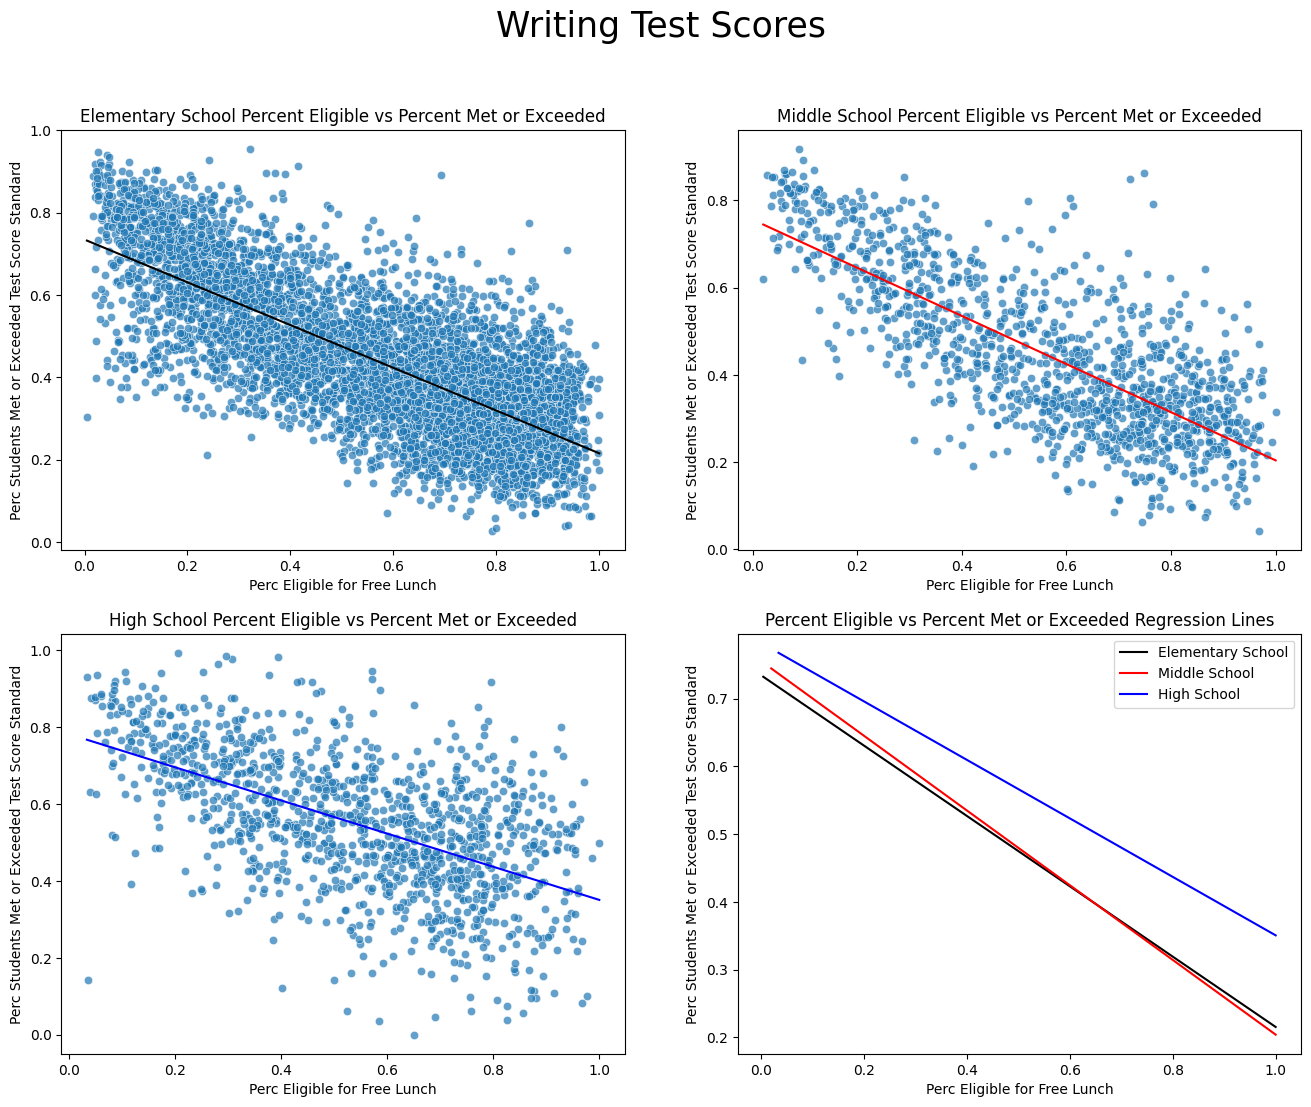

<Figure size 790x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [47]:
#setting up figure size for the main graph and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#setting up the figuresize for the elementary subplot
plt.figure(figsize=(7.9, 6))

#plotting the scatterplot and regressionline for elementary school
sns.scatterplot(Writing_ElementarySchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',alpha=.7,ax=axes[0,0])
sns.regplot(Writing_ElementarySchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',ax=axes[0,0],
            scatter=False, color='black', line_kws={'linewidth':1.5},ci=None,)

#setting the title and x,y labels for elementary schools
axes[0,0].set_title('Elementary School Percent Eligible vs Percent Met or Exceeded')
axes[0,0].set_xlabel('Perc Eligible for Free Lunch')
axes[0,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#setting up the figure size for elementary school graph
plt.figure(figsize=(8, 6))

#graphing scatterplot and regressionline for middle schools
sns.scatterplot(Writing_MiddleSchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',alpha=.7,ax=axes[0,1])
sns.regplot(data=Writing_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)',ax=axes[0,1],
            y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5},ci=None)

#setting title and x,y labels for middle schools
axes[0,1].set_title('Middle School Percent Eligible vs Percent Met or Exceeded')
axes[0,1].set_xlabel('Perc Eligible for Free Lunch')
axes[0,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#setting figure size for high school graph
plt.figure(figsize=(8, 6))

#graphing scatterplot and regressionline for high schools
sns.scatterplot(Writing_HighSchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',alpha=.7,ax=axes[1,0])
sns.regplot(Writing_HighSchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',ax=axes[1,0],
            scatter=False, color='blue', line_kws={'linewidth':1.5},ci=None)

#setting title and x,y labels for high schools
axes[1,0].set_title('High School Percent Eligible vs Percent Met or Exceeded')
axes[1,0].set_xlabel('Perc Eligible for Free Lunch')
axes[1,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#the last graph at position[1,1] is comparing the regression lines from elementary, middle and high schools

#setting up figure size for regression graphs
plt.figure(figsize=(8, 6))

#graphing regression lines for elementary, middle and high schools
sns.regplot(Writing_ElementarySchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='black', line_kws={'linewidth':1.5},label='Elementary School',ci=None)

sns.regplot(Writing_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='red', line_kws={'linewidth':1.5},label='Middle School',ci=None)

sns.regplot(Writing_HighSchool,x='Percent (%) \nEligible Free \n(K-12)',y='percent_students_met_or_exceeded',ax=axes[1, 1],
            scatter=False, color='blue', line_kws={'linewidth':1.5},label='High School',ci=None)

#setting up the legend, title and x,y labels for the regression line graph
axes[1,1].legend()
axes[1,1].set_title('Percent Eligible vs Percent Met or Exceeded Regression Lines')
axes[1,1].set_xlabel('Perc Eligible for Free Lunch')
axes[1,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')

#Giving the main graph a title
fig.suptitle('Writing Test Scores',fontsize=25)


Here we see that middle and elementary schooler writing preformance are typically more affected by poverty, as their slopes are quite steep compared to those for high schoolers

Now we follow the same steps for math scores, where we filter out non math score values, groupby school and then merge with the lunch_percent eligible dataframe

In [48]:
#filter out non math score values
Math_Scores=CleanedTest[CleanedTest['Test ID']==2]

In [49]:
#select columns from test dataset and then apply a groupby function on school name
Met_or_Exceeded_Math_Scores=(Math_Scores[['Total Students Tested','Count Standard Met','School Name','Overall Total','Count Standard Met and Above','Test ID','percent_students_met_or_exceeded']]
            .groupby(by='School Name').mean())

In [50]:
#merge the math dataset with the school dataset, using inner as to avoid data that is not properly formatted
Math_Merge=pd.merge(Met_or_Exceeded_Math_Scores,Lunch_percent_eligible,on='School Name',how='inner')

We then create dataframes for elementary, middle school and high school values by filtering boolean values for each

In [51]:
Math_ElementarySchool=Math_Merge[Math_Merge['School Type']=='Elementary Schools (Public)']
Math_MiddleSchool=Math_Merge[Math_Merge['School Type']=='Intermediate/Middle Schools (Public)']
Math_HighSchool=Math_Merge[Math_Merge['School Type']=='High Schools (Public)']

Now that we have our dataframes, we can graph our percent met or exceeded math scores vs percent eligble values

Text(0.5, 0.98, 'Math Test Scores')

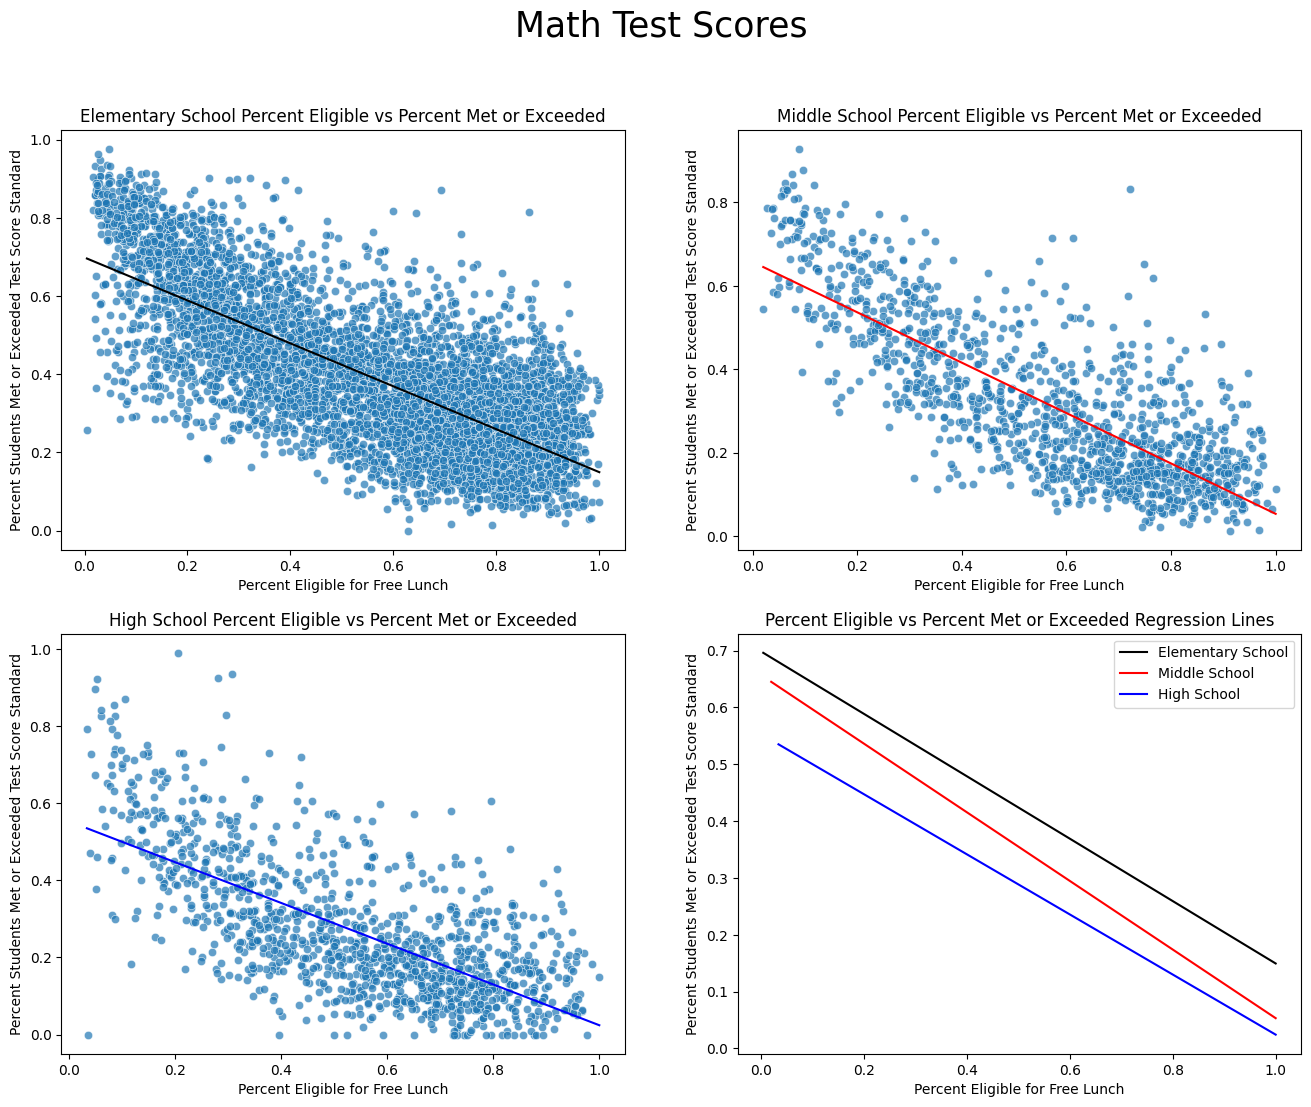

In [52]:
#setting our main figure size with 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#graphing our first subplot, which is scatter plot and regression line for elementary schools
sns.scatterplot(Math_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=.7, ax=axes[0, 0])
sns.regplot(Math_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', ax=axes[0, 0],
            scatter=False, color='black', line_kws={'linewidth': 1.5}, ci=None)

#setting our title and x,y labels for elementary schools
axes[0, 0].set_title('Elementary School Percent Eligible vs Percent Met or Exceeded')
axes[0, 0].set_xlabel('Percent Eligible for Free Lunch')
axes[0, 0].set_ylabel('Percent Students Met or Exceeded Test Score Standard')

#graphing our scatterplot and regression lines for middle schools
sns.scatterplot(Math_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=.7, ax=axes[0, 1])
sns.regplot(data=Math_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', ax=axes[0, 1],
            scatter=False, color='red', line_kws={'linewidth': 1.5}, ci=None)

#setting title and x,y labels for middle schools
axes[0, 1].set_title('Middle School Percent Eligible vs Percent Met or Exceeded')
axes[0, 1].set_xlabel('Percent Eligible for Free Lunch')
axes[0, 1].set_ylabel('Percent Students Met or Exceeded Test Score Standard')

#graphing our scatterplot and regression lines for middle schools
sns.scatterplot(Math_HighSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=.7, ax=axes[1, 0])
sns.regplot(Math_HighSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', ax=axes[1, 0],
            scatter=False, color='blue', line_kws={'linewidth': 1.5}, ci=None)

#setting title and x,y labels for high schools
axes[1, 0].set_title('High School Percent Eligible vs Percent Met or Exceeded')
axes[1, 0].set_xlabel('Percent Eligible for Free Lunch')
axes[1, 0].set_ylabel('Percent Students Met or Exceeded Test Score Standard')

#graphing fourth and final subplot, comparing regression lines of elementary, middle and high schools
sns.regplot(Math_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='black', line_kws={'linewidth': 1.5}, label='Elementary School', ci=None)

sns.regplot(Math_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='red', line_kws={'linewidth': 1.5}, label='Middle School', ci=None)

sns.regplot(Math_HighSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', ax=axes[1, 1],
            scatter=False, color='blue', line_kws={'linewidth': 1.5}, label='High School', ci=None)

#setting legend, title and x,y labels for regression line plot
axes[1, 1].legend()
axes[1, 1].set_title('Percent Eligible vs Percent Met or Exceeded Regression Lines')
axes[1, 1].set_xlabel('Percent Eligible for Free Lunch')
axes[1, 1].set_ylabel('Percent Students Met or Exceeded Test Score Standard')

#Setting title for entire figure
fig.suptitle('Math Test Scores', fontsize=25)

While the regression figure(bottom right) shows worse math scores for high schoolers on average, middle and elementary school regression lines still show a steeper slope, leading me to conclude that for writing scores as well as math scores elementary schools and middle schoolers tend to be more affected by poverty

Now that we have regression lines for elementary, middle school and high values on writing, math, and both writing and math scores we visualize them a bit better by putting them side by side

Text(0, 0.5, 'Percent Students Met or Exceeded Test Score Standard')

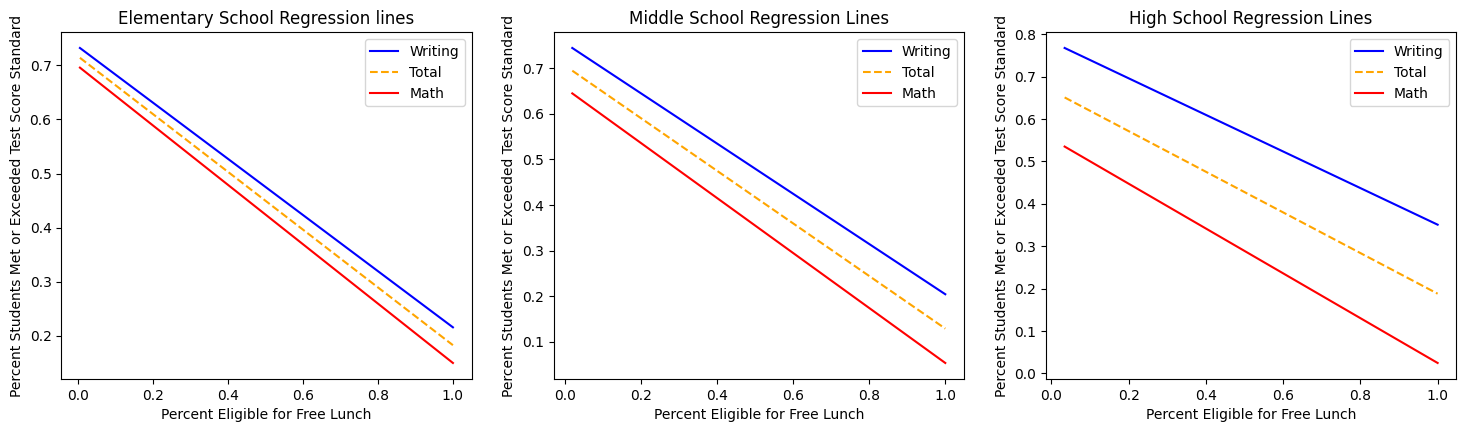

In [53]:
#setting up figure size and subplots(here we have three)
fig, axes = plt.subplots(1, 3, figsize=(18, 4.5))

#setting up first regression plot, which is writing, math and writing plus math scores for elementary schools
sns.regplot(Writing_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5}, label='Writing', ci=None, ax=axes[0])

sns.regplot(Elementary, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='orange', line_kws={'linewidth':1.5, 'linestyle': '--'}, label='Total', ci=None, ax=axes[0])

sns.regplot(Math_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5}, label='Math', ci=None,ax=axes[0])

#setting up legend, title and x,y labels for elementary school plot
axes[0].legend()
axes[0].set_title('Elementary School Regression lines')
axes[0].set_xlabel('Percent Eligible for Free Lunch')
axes[0].set_ylabel('Percent Students Met or Exceeded Test Score Standard')

#setting up second plot which is regression lines for writing, math and writing plus math scores for middle school students
sns.regplot(Writing_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5}, label='Writing', ci=None, ax=axes[1])

sns.regplot(Middle_School, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='orange', line_kws={'linewidth':1.5, 'linestyle': '--'}, label='Total', ci=None, ax=axes[1])

sns.regplot(Math_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5}, label='Math', ci=None,ax=axes[1])

#setting up title, legend, and x,y labels for middle school plot. The reason there are two y labels is because they graph can either
#be formated with a blank y axis or a labeled one because a label already exists on the far left of the graph
axes[1].legend()
axes[1].set_title('Middle School Regression Lines')
axes[1].set_xlabel('Percent Eligible for Free Lunch')
#axes[1].set_ylabel('')
axes[1].set_ylabel('Percent Students Met or Exceeded Test Score Standard')

#setting up third and final plot which is regression lines for writing, math and math plus writing scores for high school students.
sns.regplot(Writing_HighSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5}, label='Writing', ci=None, ax=axes[2])

sns.regplot(High_School, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='orange', line_kws={'linewidth':1.5, 'linestyle': '--'}, label='Total', ci=None, ax=axes[2])

sns.regplot(Math_HighSchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5}, label='Math', ci=None,ax=axes[2])

#setting up title, legend and x,y scores for high school regression plot. Much like the middle school graph, there are two options
#for how we go about labeling y axis. I opted to keep the label for all graphs
axes[2].legend()
axes[2].set_title('High School Regression Lines')
axes[2].set_xlabel('Percent Eligible for Free Lunch')
axes[2].set_ylabel('Percent Students Met or Exceeded Test Score Standard')
#axes[2].set_ylabel(' ')

#to avoid clutter I did not give this graph a title


Here we see that over time writing scores tend to increase and math scores tend to decrease as a student develops(moving from elementary to middle to high school) with each grade level increase widening this gap. This affect is seen for all school income levels.

 Writing scores tend to be affected less by poverty relative to math scores(as seen in the relative steepness of the writing regression line). This causes the gaps between scores tend to widen as schools experience more poverty

The individual plots are also laid out below for elementary, middle and high school regression lines

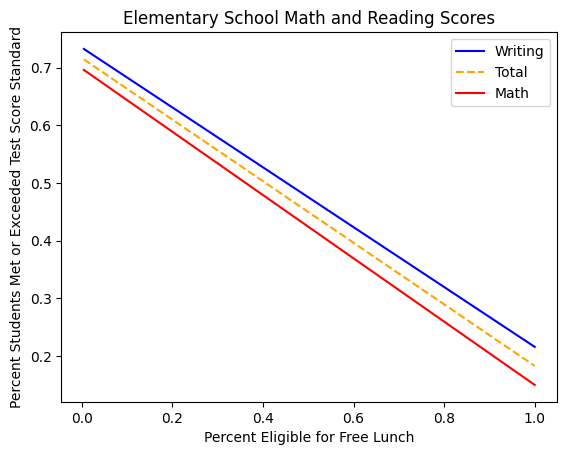

In [54]:
#elementary school regression lines
sns.regplot(Writing_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5}, label='Writing', ci=None)

sns.regplot(Elementary, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='orange', line_kws={'linewidth':1.5, 'linestyle': '--'}, label='Total', ci=None)

sns.regplot(Math_ElementarySchool, x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5}, label='Math', ci=None)


plt.legend()

plt.title('Elementary School Math and Reading Scores')
plt.xlabel('Percent Eligible for Free Lunch')
plt.ylabel('Percent Students Met or Exceeded Test Score Standard')
plt.show()


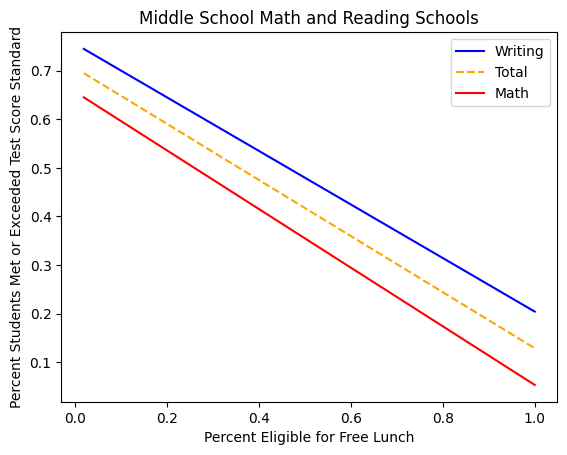

In [55]:
#middle school regression lines
sns.regplot(Writing_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5}, label='Writing', ci=None)

sns.regplot(data=Middle_School, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded',
            scatter=False, color='orange', line_kws={'linewidth':1.5, 'linestyle': '--'}, label='Total', ci=None)

sns.regplot(Math_MiddleSchool, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5}, label='Math', ci=None)

plt.legend()

plt.title('Middle School Math and Reading Schools')
plt.xlabel('Percent Eligible for Free Lunch')
plt.ylabel('Percent Students Met or Exceeded Test Score Standard')
plt.show()


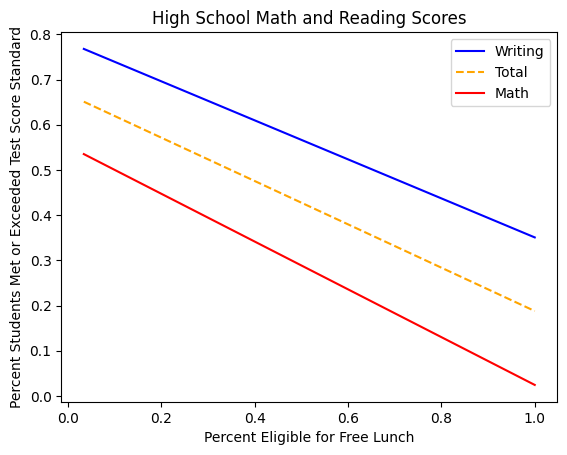

In [56]:
#high school regression lines
sns.regplot(Writing_HighSchool, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5}, label='Writing', ci=None)

sns.regplot(High_School, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded',
            scatter=False, color='orange', line_kws={'linewidth':1.5, 'linestyle': '--'}, label='Total', ci=None)

sns.regplot(Math_HighSchool, x='Percent (%) \nEligible Free \n(K-12)',
            y='percent_students_met_or_exceeded',
            scatter=False, color='red', line_kws={'linewidth':1.5}, label='Math', ci=None)

plt.legend()

plt.title('High School Math and Reading Scores')
plt.xlabel('Percent Eligible for Free Lunch')
plt.ylabel('Percent Students Met or Exceeded Test Score Standard')
plt.show()


Looking at Charter School Data

---



To find charter schools it is a relatively simple process of filtering charter schools based on boolean values. There was some issues with how the charter school entries were entered, but I fixed that at the beginning of my code

First we need to create dataframes for elementary, middle and high schools based on charter school status

In [57]:
Charter_Elementary=Elementary[Elementary['Charter_School']=='Yes']
Not_Charter_Elementary=Elementary[Elementary['Charter_School']=='No']

In [58]:
Charter_Middle_School=Middle_School[Middle_School['Charter_School']=='Yes']
Not_Charter_Middle_School=Middle_School[Middle_School['Charter_School']=='No']

In [59]:
Charter_High_School=High_School[High_School['Charter_School']=='Yes']
Not_Charter_High_School=High_School[High_School['Charter_School']=='No']

Now that we have our dataframes we can graph each charter school relationship

For varietys sake, these graphs will be formated differently than my other graphs, where we will first show raw data and then compare with regression lines

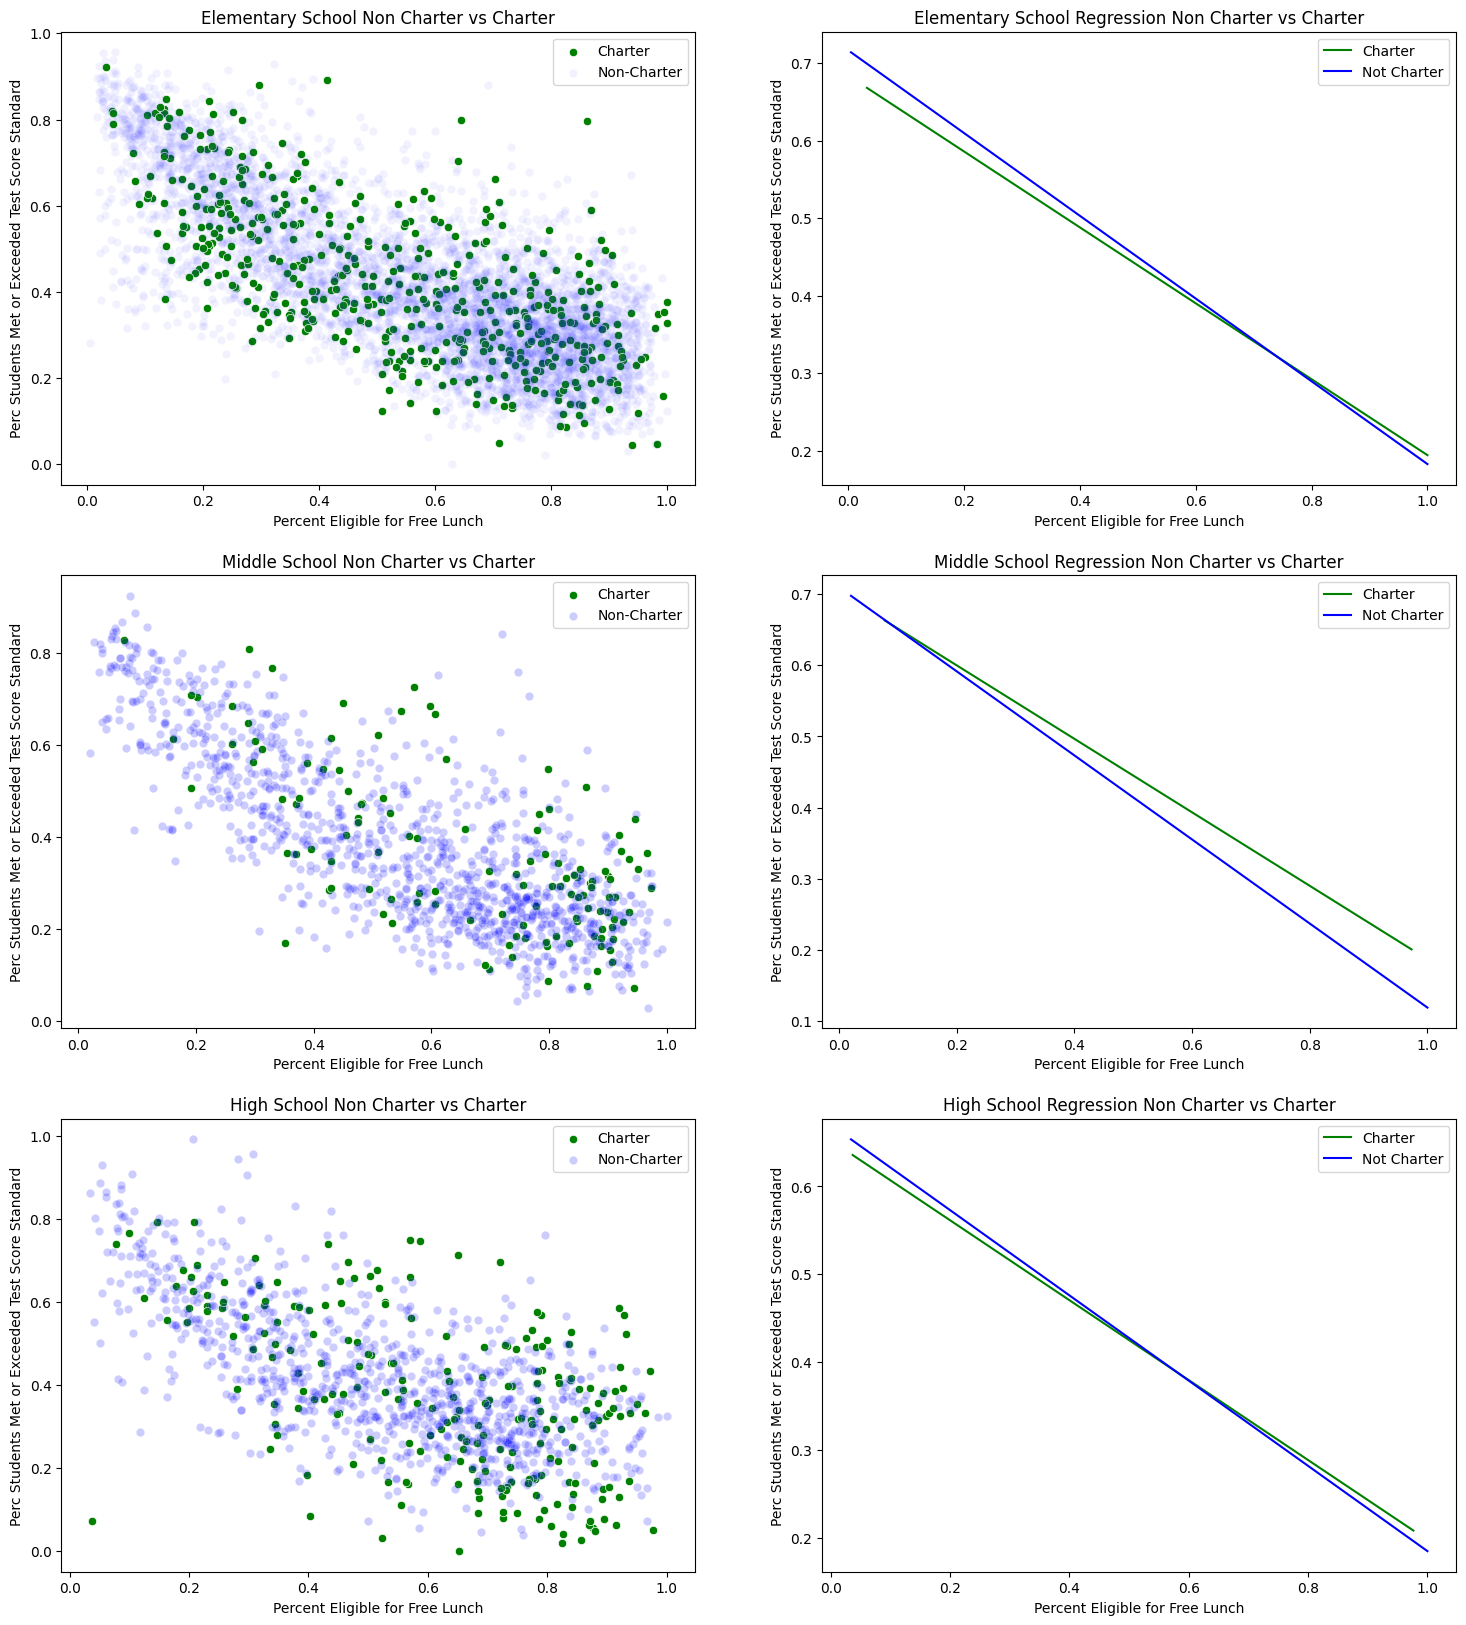

In [63]:
fig, axes = plt.subplots(3, 2, figsize=(18, 20))

#setting up scatterplot for both non charter elementary and charter elementary as well as setting title, x,y label, and legend
sns.scatterplot(Charter_Elementary,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=1, color='green',label='Charter',ax=axes[0,0])
sns.scatterplot(Not_Charter_Elementary,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=0.05, color='blue',label='Non-Charter',ax=axes[0,0])
axes[0,0].set_xlabel('Percent Eligible for Free Lunch')
axes[0,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[0,0].set_title('Elementary School Non Charter vs Charter')
axes[0,0].legend()

#graphing regression line for both charter and non charter elementary as well as setting title, x,y labels and legend
sns.regplot(Charter_Elementary,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='green', line_kws={'linewidth':1.5},ci=None,label='Charter', ax=axes[0,1])

sns.regplot(Elementary,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5},ci=None,label='Not Charter',ax=axes[0,1])

axes[0,1].set_xlabel('Percent Eligible for Free Lunch')
axes[0,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[0,1].set_title('Elementary School Regression Non Charter vs Charter')
axes[0,1].legend()

#setting up scatterplot for both non charter middle school and charter middle school, as well as setting title, x,y labels and legend
sns.scatterplot(Charter_Middle_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=1, color='green',label='Charter',ax=axes[1,0])
sns.scatterplot(Not_Charter_Middle_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=0.2, color='blue',label='Non-Charter',ax=axes[1,0])
axes[1,0].set_xlabel('Percent Eligible for Free Lunch')
axes[1,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[1,0].set_title('Middle School Non Charter vs Charter')

#setting up regression line for both charter and non charter middle school as well as setting title, x,y labels and legend
sns.regplot(Charter_Middle_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='green', line_kws={'linewidth':1.5},ci=None,label='Charter', ax=axes[1,1])

sns.regplot(Not_Charter_Middle_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5},label='Not Charter',ci=None,ax=axes[1,1])
axes[1,1].set_xlabel('Percent Eligible for Free Lunch')
axes[1,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[1,1].set_title('Middle School Regression Non Charter vs Charter')
axes[1,1].legend()

#setting up scatterplot for both non charter high school and charter high school, as well as setting title, x,y labels and legend
sns.scatterplot(Charter_High_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=1, color='green',label='Charter',ax=axes[2,0])
sns.scatterplot(Not_Charter_High_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=0.2, color='blue',label='Non-Charter',ax=axes[2,0])
axes[2,0].set_xlabel('Percent Eligible for Free Lunch')
axes[2,0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[2,0].set_title('High School Non Charter vs Charter')

#setting up regression line for both charter and non charter high school as well as setting title, x,y labels and legend
sns.regplot(Charter_High_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='green', line_kws={'linewidth':1.5},ci=None,label='Charter', ax=axes[2,1])

sns.regplot(Not_Charter_High_School,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5},label='Not Charter',ci=None,ax=axes[2,1])
axes[2,1].set_xlabel('Percent Eligible for Free Lunch')
axes[2,1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[2,1].set_title('High School Regression Non Charter vs Charter')
axes[2,1].legend()


It seems as though charter school results are very similar to non charter schools although their regression lines for elementary, middle and high schools are not as steep, implying that they are slightly less affected by poverty.

Keep in mind we are comparing charter schools to non charter schools with a similar eligibility percentage

We can also look at this relationship for all schools, by first creating charter and non charter dataframes and then by graphing scatter and regression plots side by side

In [61]:
#filtering charter schools for all school types
Charter_School_All=merge[merge['Charter_School']=='Yes']
Not_Charter_School_All=merge[merge['Charter_School']=='No']

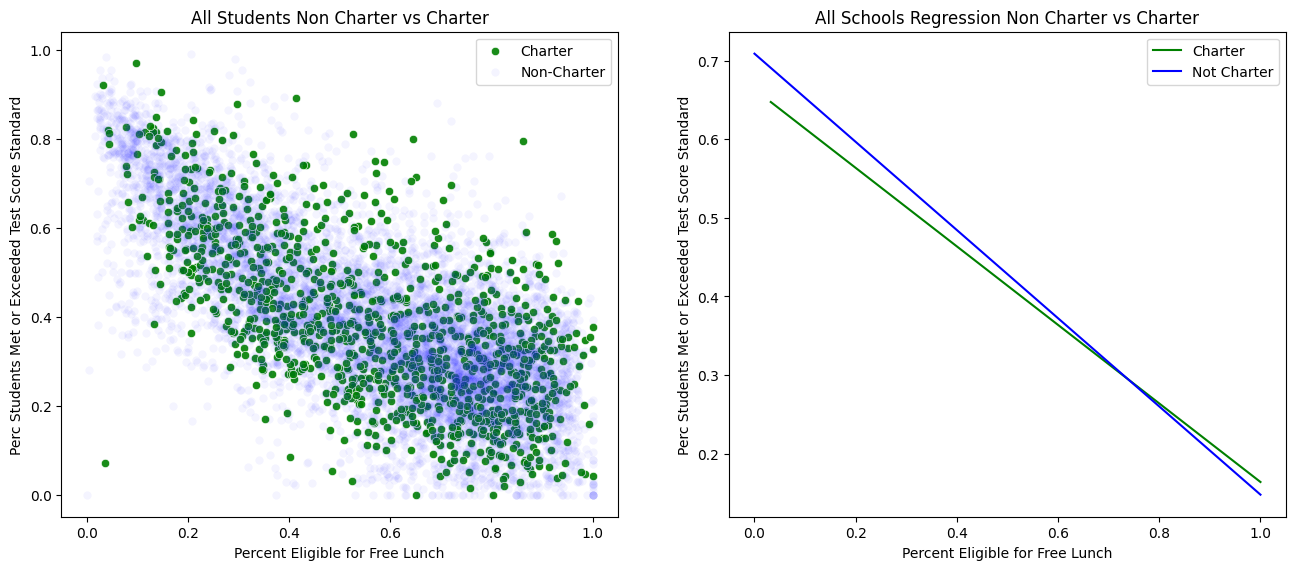

In [62]:
fig, axes=plt.subplots(1,2, figsize=(15.8,6.3))

#setting up scatterplot for both charter and non charter schools as well as setting title, x,y lables and legend
sns.scatterplot(Charter_School_All,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=.9, color='green',label='Charter',ax=axes[0])
sns.scatterplot(Not_Charter_School_All,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded', alpha=0.045, color='blue',label='Non-Charter',ax=axes[0])

axes[0].set_xlabel('Percent Eligible for Free Lunch')
axes[0].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[0].set_title('All Students Non Charter vs Charter')


#setting up regression line for both charter and non charter high school as well as setting title, x,y labels and legend
sns.regplot(Charter_School_All,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='green', line_kws={'linewidth':1.5},ci=None,label='Charter', ax=axes[1])

sns.regplot(Not_Charter_School_All,x='Percent (%) \nEligible Free \n(K-12)', y='percent_students_met_or_exceeded',
            scatter=False, color='blue', line_kws={'linewidth':1.5},label='Not Charter',ci=None,ax=axes[1])
axes[1].set_xlabel('Percent Eligible for Free Lunch')
axes[1].set_ylabel('Perc Students Met or Exceeded Test Score Standard')
axes[1].set_title('All Schools Regression Non Charter vs Charter')
axes[1].legend()


It seems as though charter schools on average are slighly less affected by poverty than non charter schools, but in general a schools charter status does not have a significant effect on test scores